# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Jacopo De Stefani - __[Jacopo.De.Stefani@ulb.ac.be](mailto:Jacopo.De.Stefani@ulb.ac.be)__
### Bertrand Lebichot - __[Bertrand.Lebichot@ulb.ac.be](mailto:Bertrand.Lebichot@ulb.ac.be)__
### Arnaud Pollaris - __[Arnaud.Pollaris@ulb.ac.be](mailto:Arnaud.Pollaris@ulb.ac.be)__

## TP 2 - Estimation

####  March 12, 2019

#### Materials originally developed by *Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi*


## Basic notions

* Estimation: it is the procedure which allows to *estimate* a parameter of a distribution (expected value, variance, ...) from $N$ samples drawn from this distribution.
* Typical estimators of the expected value and the variance are given by the sample mean
$$
 \hat{\mu}=\frac{1}{N}\sum_{i=1}^N z_i\\
$$
and sample variance
$$
\hat{\sigma}^2= \frac{1}{N-1}\sum_{i=1}^N (z_i-\hat{\mu})^2,
$$
where $D_N=\{z_1,\ldots,z_n\}$ is our sampleset.
* An estimator $\hat{\boldsymbol{\theta}}$ is a random variable itself, since it depends on a random sample $\mathbf{D}_N$.
* An estimator $\hat{\boldsymbol{\theta}}$ of a parameter $\theta$ is called unbiased if and only if

\begin{equation}
 {E}_{\boldsymbol{D}_N}[\hat{\boldsymbol{\theta}}]=\theta.
\end{equation}

If not, we define the *bias* as follows

\begin{equation}
\mbox{Bias}[\hat{\boldsymbol{\theta}}]={E}_{\boldsymbol{D}_N}[\hat{\boldsymbol{\theta}}]-\theta.
\end{equation}
*  The variance of an estimator is defined as
\begin{equation}
 \mbox{Var}[\hat{\boldsymbol{\theta}}]={E}_{\boldsymbol{D}_N}[(\hat{\boldsymbol{\theta}}-E[\hat{\boldsymbol{\theta}}])^2].
\end{equation}
*  Bias and variance of $\hat{\mathbf{\mu}}$:
\begin{equation}
 {E}_{\boldsymbol{D}_N}[\hat{\boldsymbol{\mu}}]=\mu.
\end{equation}
The estimator $\hat{\boldsymbol{\mu}}$ is therefore unbiased and its variance is
\begin{equation}
  \mbox{Var}[\hat{\boldsymbol{\mu}}]=\frac{\sigma^2}{N}.
\end{equation}
where $\mbox{Var}[{\mathbf{z}}]=\sigma^2$.

*  Bias of $\hat{\boldsymbol{\sigma}}^2$:
\begin{equation}
 E_{\boldsymbol{D}_N}[\hat{\boldsymbol{\sigma}}^2]=\sigma^2.
\end{equation}
The estimator $\hat{\boldsymbol{\sigma}}^2$ is thus unbiased.

*  The quality of an estimator $\hat{\boldsymbol{\theta}}$ can be measured using the *mean square error*

\begin{equation}
 \mbox{MSE}={E}_{\boldsymbol{D}_N}[(\theta - \hat{\boldsymbol{\theta}})^2].
\end{equation}
We can show that for all estimators $\hat{\boldsymbol{\theta}}$
\begin{equation}
 \mbox{MSE}=\mbox{Var}[\hat{\boldsymbol{\theta}}]+({E}[\hat{\boldsymbol{\theta}}]-\theta)^2.
\end{equation}
is the sum of the variance and the squared bias.
*  Let $\hat{F}_z(x)=\frac{1}{z}\sum_{i=1}^z \mathbb{1}_{x_i\le t}$ be the empirical distribution function. We have
\begin{equation}
 {E}_{\boldsymbol{D}_N}[\hat{\bf F}_z(x)]=F_z(x),
\end{equation}
where $F_z(x)$ is the distribution function of the variable $\boldsymbol{z}$.

*  Let $N$ observations be drawn form a normal distribution with mean $\mu$ and standard deviation $\sigma$. The estimator $\hat{\boldsymbol{\mu}}$ of the mean  follows a normal distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{N}$. It follows that a confidence interval for $\mu$ is given by

\begin{equation}
 \mbox{Prob}\left\{ \hat{\boldsymbol{\mu}}-z_{\alpha/2}\frac{\sigma}{\sqrt{N}} \le \mu\le \hat{\boldsymbol{\mu}}+z_{\alpha/2}\frac{\sigma}{\sqrt{N}}\right\}=1-\alpha,
\end{equation}

where $\alpha$ is directly related to the probability $P$ that the interval contains $\mu$.



## Practical experiments 

The R programs are written in files with the extension '.R', which can be edited using text editors such as emacs, gedit, etc. The file can be loaded in the R terminal with the command

```
source("filename.R")
```

The additional parameter *print.eval=T* forces all outputs of the scripts to be displayed on the screen: 
```
source("filename.R", print.eval=T)
```

You can directly change into the directory containing the scripts using the command 
```
setwd("directory containing the scripts")
```
The goal of this TP is to write script for the following exercises. 

You can use the scripts *cumdis.R, cumdis_2.R, sam_dis.R, sam_dis2.R, sam_dis_unif.R, mse_bv.R, combine.R* and *confidence.R* to help you with the exercises. The scripts are available on the homepage of the course: https://github.com/gbonte/gbcode/tree/master/inst/scripts.

## Distribution function 

Write a script that displays the empirical cumulative distribution function of a distribution $\mathcal{N}(1,2)$ with 100 observations. Use the functions *ecdf* and *rnorm*. See [cumdis.R](https://github.com/gbonte/gbcode/tree/master/inst/scripts/cumdis.R).



In [3]:
N <- 100
obs <- rnorm(N, mean=1, sd=2)

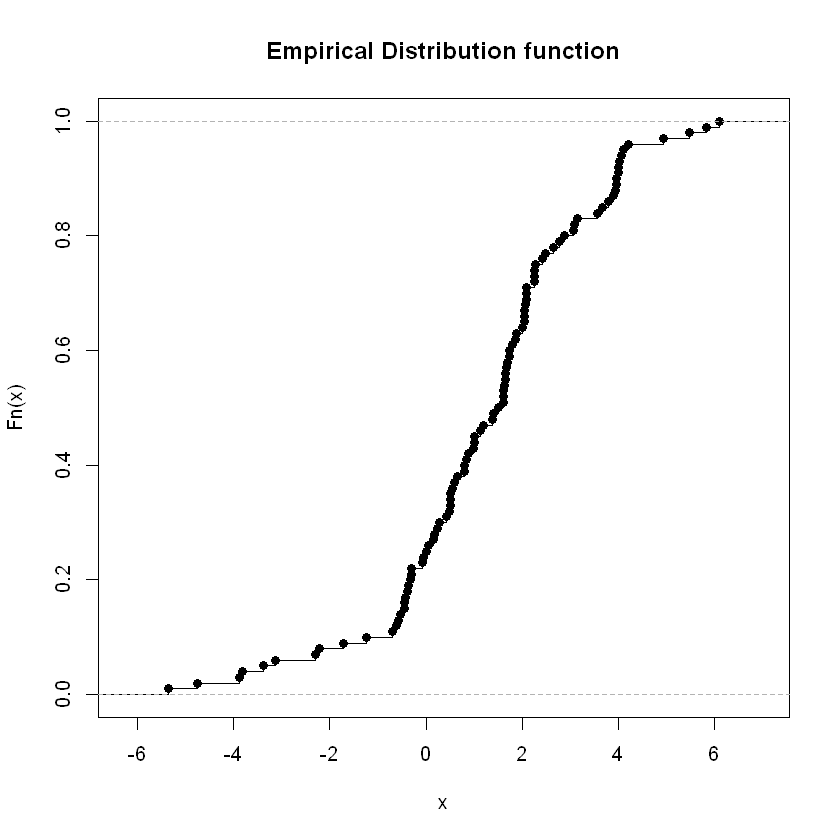

In [4]:
plot.ecdf(obs,verticals=TRUE,main="Empirical Distribution function")

## Expected value of the empirical distribution function

Write a script which verifies the assertion ${E}_{\mathbf{D}_N}[\hat{\bf F}_z(x)]=F_z(x)$ concerning the cumulative empirical distribution function. Modify the previous code in order to

* generate $R$ samples of 100 observations
* average the $R$ empirical cdfs
* trace the distribution function of the sample mean and compare it with the theoretical distribution function.
* observe the results for $R\in \{5,10,50,100\}.$

See [cumdis_2.R](https://github.com/gbonte/gbcode/tree/master/inst/scripts/cumdis_2.R).

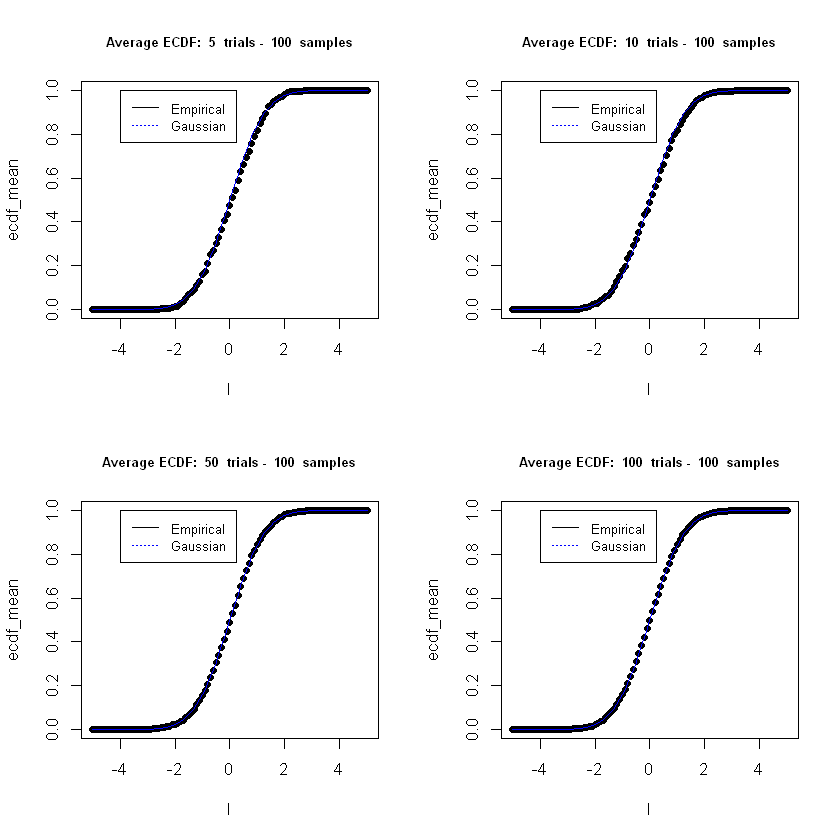

In [5]:
N <-100
I<-seq(-5,5,by=.1) # Similar domain for ECDF
mu <- 0
sigma <- 1

par(mfrow=c(2,2))

for(R in c(5,10,50,100)){
    ecdf_matrix <- NULL
    for(i in 1:R){
        obs <- rnorm(N, mean=mu, sd=sigma)
        ecdf_obs <- ecdf(obs)
        ecdf_matrix <- rbind(ecdf_matrix,ecdf_obs(I))
        ecdf_mean <- apply(ecdf_matrix,2,mean)
    }
    
    plot(I,ecdf_mean,pch=16,cex.main=0.8,main=paste("Average ECDF: ",R," trials - ", N, " samples"))
    lines(I,pnorm(I),col="blue") # Theoretical distribution function
    legend(-4,1,legend=c("Empirical","Gaussian"),lty=c(1,3),cex=0.8,col=c("black","blue"))
}

## Estimator of the mean

Write a script which returns 1000 estimations of the sample's mean using $N$ observations following a normal distribution $\mathcal{N}(0,100)$. Use $N=50$, $N=75$ and $N=100$. Plot the histogram of these estimations and compare this with the theoretical distribution of the mean's estimator. 

Make use of the script [sam_dis.R](https://github.com/gbonte/gbcode/tree/master/inst/scripts/sam_dis.R) which allows to see in practice how the estimator $\hat{\boldsymbol{\mu}}$ of the mean is distributed for a normal distribution of the data. 

Observe that it is unbiased and that its distribution is $\mathcal{N}(\mu, \sigma^2/N)$ (have a look at the observed variances and at the shape of the histograms).



[1] "[INFO] - N: 50  - R: 1000  Mean of estimator: -0.000681646157475084"
[1] "[INFO] - N: 50  - R: 1000  Variance of estimator: 1.86357982861651"
[1] "[INFO] - N: 75  - R: 1000  Mean of estimator: 0.0130820243267606"
[1] "[INFO] - N: 75  - R: 1000  Variance of estimator: 1.31946304525444"
[1] "[INFO] - N: 100  - R: 1000  Mean of estimator: 0.0150781197007071"
[1] "[INFO] - N: 100  - R: 1000  Variance of estimator: 0.958650112920143"
[1] "[INFO] - N: 1000  - R: 1000  Mean of estimator: 0.00907490602975851"
[1] "[INFO] - N: 1000  - R: 1000  Variance of estimator: 0.112299105558506"
[1] "[INFO] - N: 10000  - R: 1000  Mean of estimator: 0.00260097081545971"
[1] "[INFO] - N: 10000  - R: 1000  Variance of estimator: 0.0096420519887033"


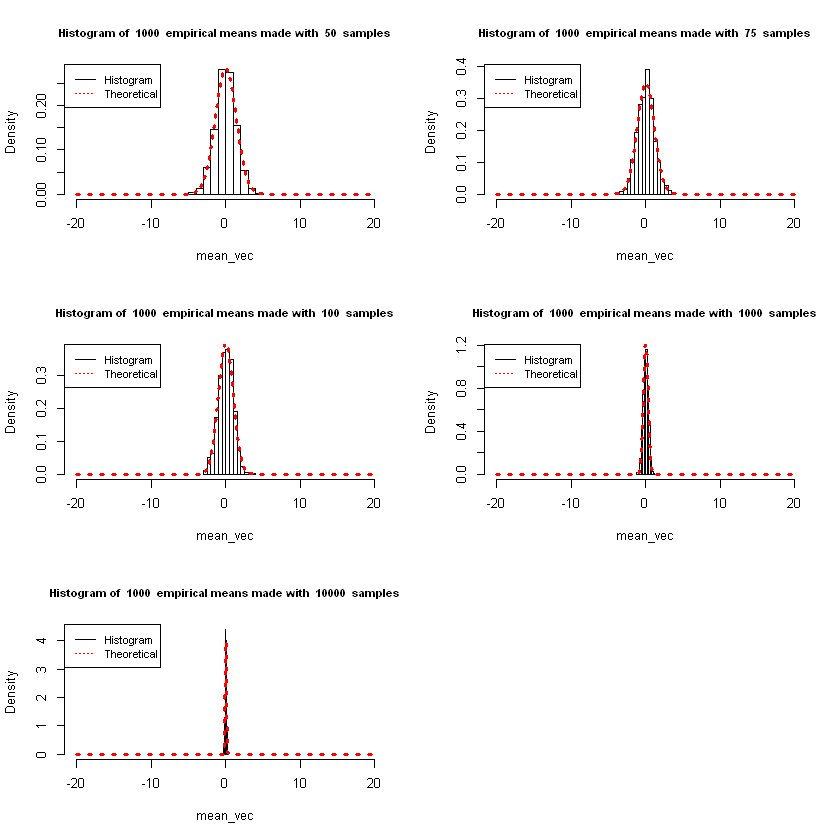

In [6]:
R <- 1000
mu <- 0
sigma <- 10
I<-seq(-20,20,length.out=10000)

par(mfrow=c(3,2))
for (N in c(50,75,100,1000,10000)){
    mean_vec <- array(0,dim=c(R,1))
    
    for (i in 1:R){
        obs <- rnorm(N,mean=mu,sd=sigma)
        mean_vec[i,1] <- mean(obs)
    }
    
    print(paste("[INFO] - N:", N , " - R:", R , " Mean of estimator:",mean(mean_vec)))
    print(paste("[INFO] - N:", N , " - R:", R , " Variance of estimator:",var(mean_vec)))
    
    hist(mean_vec, freq=FALSE,
         main=paste("Histogram of ",R," empirical means made with ", N, " samples"), 
         xlim=c(min(I),max(I)),cex.main=0.8)
    
    # Real distribution
    p_real<-dnorm(I,mean=mu,sd=sigma/sqrt(N))
    lines(I,p_real,lty=3,pch=15,lwd=3,col="red")
        
    legend("topleft",legend=c("Histogram","Theoretical"),lty=c(1,3,3),cex=0.8,col=c("black","red","blue"))
}

## Estimator of the variance

Proceed equivalently except that here the estimator of the variance is considered. We want to verify that $\frac{(N-1)\hat{\boldsymbol{\sigma}}^2}{\sigma^2}\sim \chi^2_{N-1}$. Use $N=10$.



[1] "[INFO] - N: 10  - R: 1000  Mean of estimator: 99.3375216864953"
[1] "[INFO] - N: 10  - R: 1000  Variance of estimator: 2404.33813801404"
[1] "[INFO] - N: 100  - R: 1000  Mean of estimator: 99.6968901506311"
[1] "[INFO] - N: 100  - R: 1000  Variance of estimator: 215.092853839104"
[1] "[INFO] - N: 200  - R: 1000  Mean of estimator: 99.9057194523986"
[1] "[INFO] - N: 200  - R: 1000  Variance of estimator: 103.140120949752"
[1] "[INFO] - N: 1000  - R: 1000  Mean of estimator: 99.7137944142644"
[1] "[INFO] - N: 1000  - R: 1000  Variance of estimator: 21.6071243988915"


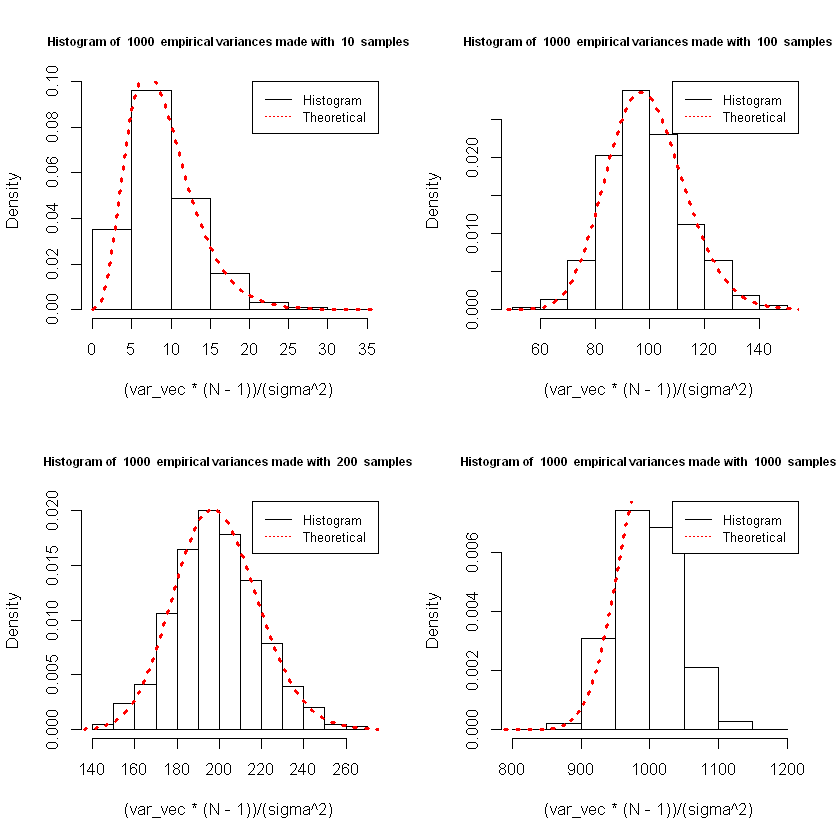

In [7]:
R <- 1000
mu <- 0
sigma <- 10
I<-seq(0,1000,length.out=R)

par(mfrow=c(2,2))

for (N in c(10,100,200,1000)){
    var_vec <- array(0,dim=c(R,1))
    
    for (i in 1:R){
        obs <- rnorm(N,mean=mu,sd=sigma)
        var_vec[i,1] <- var(obs)
    }
    
    print(paste("[INFO] - N:", N , " - R:", R , " Mean of estimator:",mean(var_vec)))
    print(paste("[INFO] - N:", N , " - R:", R , " Variance of estimator:",var(var_vec)))
    
    hist((var_vec*(N-1))/(sigma^2), freq=FALSE, cex.main=0.7,
         main=paste("Histogram of ",R," empirical variances made with ", N, " samples"))
    
    # Real distribution
    p_real<-dchisq(I,df=N-1)
    lines(I,p_real,lty=3,pch=15,lwd=3,col="red")
    
    legend("topright",legend=c("Histogram","Theoretical"),lty=c(1,3),cex=0.8,col=c("black","red"))
}

## Bias and variance

Write a script which verifies the equation

\begin{equation}
 \mbox{MSE}=\mbox{Var}[\hat{\boldsymbol{\theta}}]+({E}[\hat{\boldsymbol{\theta}}]-\theta)^2.
\end{equation}

Take as an example the estimator of the mean of 10 observations following the distribution $\mathcal{N}(0,100)$, by generating 10000 estimations.

In this case:

- $MSE$ = $\frac{1}{R} \sum_{i=0}^{R} (\hat{\theta_i} - \theta)^2$
- $\theta$ = $\mu$ $\Rightarrow$ $\hat{\theta}$ = $\hat{\mu}$
- $E[\hat{\theta}]$ = $\frac{1}{R} \sum_{i=0}^{R} \hat{\mu_i}$
- $Var(\hat{\theta})$ = $\frac{1}{R} \sum_{i=0}^{R} (\hat{\mu_i} - E[\hat{\theta}])^2$


In [8]:
mu <- 0
sigma <- 10
R <- 10000

for (N in c(10,100,1000)){
    est_vec <- array(0,dim=c(R,1))
    
    for (i in 1:R){
        obs <- rnorm(N,mean=mu,sd=sigma)
        est_vec[i,1] <- mean(obs)
    }
    
    bias <- (mean(est_vec) - mu)^2
    variance <- var(est_vec)
    MSE <- mean((est_vec-mu)^2)
    
    print(paste("[INFO] - N:", N , " - R:", R, " - Bias + Variance:",bias+variance))
    print(paste("[INFO] - N:", N , " - R:", R,"- MSE:",MSE))
}


[1] "[INFO] - N: 10  - R: 10000  - Bias + Variance: 9.92392244788059"
[1] "[INFO] - N: 10  - R: 10000 - MSE: 9.92293019200224"
[1] "[INFO] - N: 100  - R: 10000  - Bias + Variance: 1.02036176882971"
[1] "[INFO] - N: 100  - R: 10000 - MSE: 1.02025975998454"
[1] "[INFO] - N: 1000  - R: 10000  - Bias + Variance: 0.101461128249943"
[1] "[INFO] - N: 1000  - R: 10000 - MSE: 0.101450982516217"


## Mean of estimators

The mean of unbiased estimators, having the same variance is itself unbiased but has a variance twice smaller than that of the estimators it has been derived from (see slides 22-23 in the file https://uv.ulb.ac.be/pluginfile.php/1257535/mod_resource/content/2/theory4.pdf). Write a script which illustrates this by

* generating independently two distributions of the estimator of the mean for a uniform distribution assuming values between -10 and 10,
* displaying the histograms of the two distributions and the combination of both and compute their variance.




[1] "[INFO] - N: 10  - R: 100  Mean of estimator 1 : -0.190178329823539"
[1] "[INFO] - N: 10  - R: 100  Variance of estimator 1: 3.52272873484329"
[1] "[INFO] - N: 10  - R: 100  Mean of estimator 2 : -0.0043037218041718"
[1] "[INFO] - N: 10  - R: 100  Variance of estimator 2: 3.35139491074125"
[1] "[INFO] - N: 10  - R: 100  Mean of combined estimator: -0.0972410258138552"
[1] "[INFO] - N: 10  - R: 100  Variance of combined estimator: 1.64724608823337"


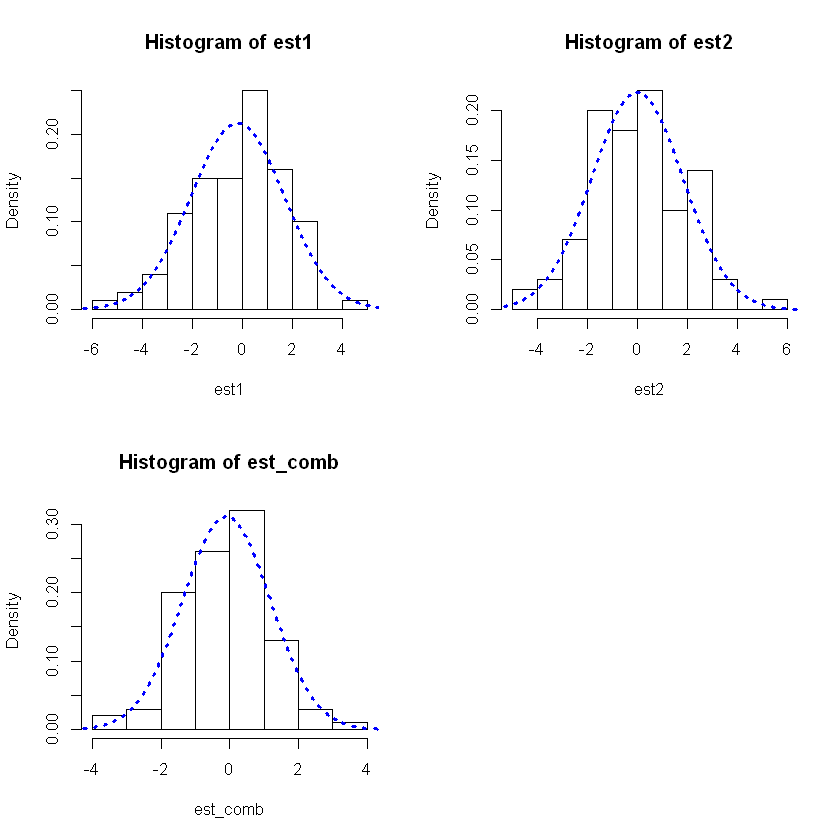

In [9]:
set.seed(17)
R <- 100
N <- 10
I <- seq(-10,10,length.out = N*R)

sampling1 <- array(runif(R*N, min = -10, max = 10),c(R,N))
sampling2 <- array(runif(R*N, min = -10, max = 10),c(R,N))

est1 <- apply(sampling1,1,mean)
est2 <- apply(sampling2,1,mean)
est_comb <- (est1+est2)/2

print(paste("[INFO] - N:", N , " - R:", R , " Mean of estimator 1 :",mean(est1)))
print(paste("[INFO] - N:", N , " - R:", R , " Variance of estimator 1:",var(est1)))
print(paste("[INFO] - N:", N , " - R:", R , " Mean of estimator 2 :",mean(est2)))
print(paste("[INFO] - N:", N , " - R:", R , " Variance of estimator 2:",var(est2)))
print(paste("[INFO] - N:", N , " - R:", R , " Mean of combined estimator:",mean(est_comb)))
print(paste("[INFO] - N:", N , " - R:", R , " Variance of combined estimator:",var(est_comb)))

par(mfrow=c(2,2))

p_est_comb<-dnorm(I,mean=mean(est_comb),sd=sqrt(var(est_comb)))

hist(est1,freq=FALSE)    
# Estimated distribution
p_est<-dnorm(I,mean=mean(est1),sd=sqrt(var(est1)))
lines(I,p_est,lty=3,pch=15,lwd=3,col="blue")
#lines(I,p_est_comb,lty=3,pch=15,lwd=3,col="red")
hist(est2,freq=FALSE)

# Estimated distribution
p_est<-dnorm(I,mean=mean(est2),sd=sqrt(var(est2)))
lines(I,p_est,lty=3,pch=15,lwd=3,col="blue")
#lines(I,p_est_comb,lty=3,pch=15,lwd=3,col="red")


hist(est_comb,freq=FALSE)
# Estimated distribution
lines(I,p_est_comb,lty=3,pch=15,lwd=3,col="blue")


## Confidence intervals

Write a script which generates $N$ samples of the distribution $\mathcal{N}(1,5)$, returns the percentage of values not falling into the $P\%$ confidence interval. Test, using $P=95\%$ with $N=100$ and $N=1000$.

**N.B.** The requested confidence interval is for a normal distribution, **not** the confidence interval for the sample mean. Here you can find a plot of the different values of critical points for different confidence levels $\alpha$.

Below you can find the actual solution of the exercise for different values of $N$.

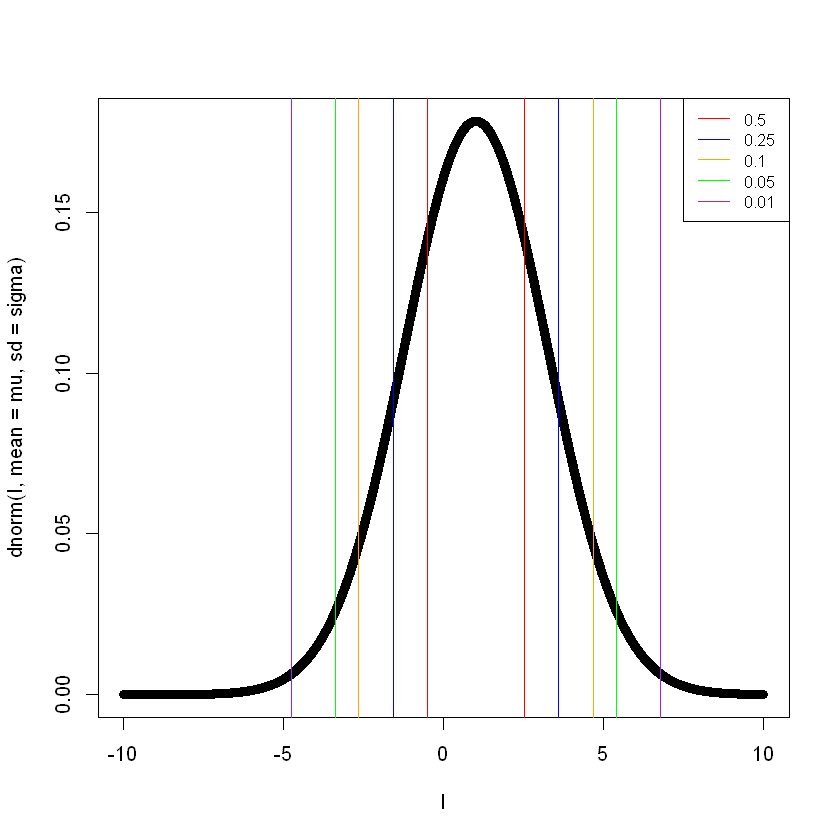

In [10]:
mu <- 1
sigma <- sqrt(5)
alpha <- c(0.5,0.25,0.10,0.05,0.01)
z_alpha_2 <- qnorm(alpha/2,lower=FALSE)
colors <- c("red","blue","orange","green","purple")

I <- seq(-10,10,length.out = 10000)
plot(I,dnorm(I,mean=mu,sd=sigma))
for(i in 1:length(z_alpha_2)){
    abline(v=mu-z_alpha_2[i]*sigma,col=colors[i])
    abline(v=mu+z_alpha_2[i]*sigma,col=colors[i])

}
legend("topright",legend=alpha,lty=c(1,1,1),cex=0.8,col=colors)

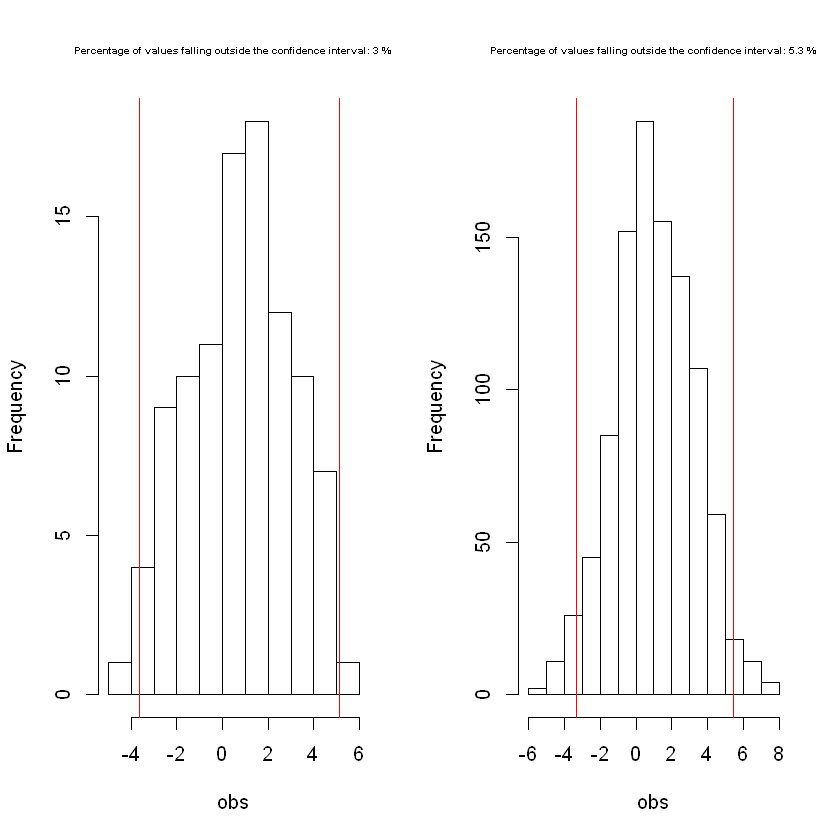

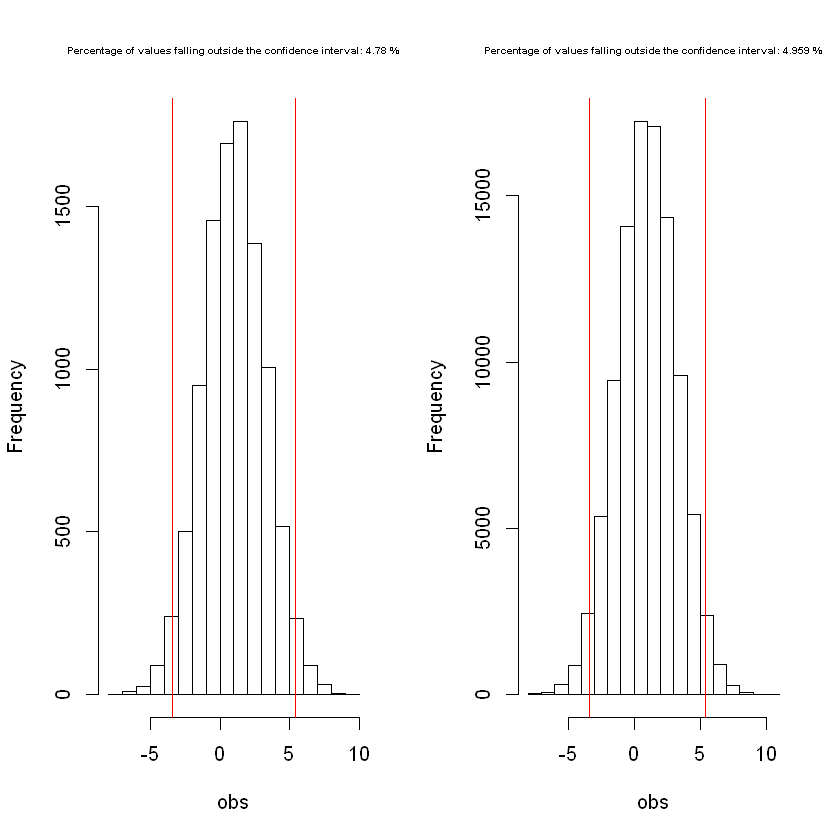

In [11]:
P <- 0.95

par(mfrow=c(1,2))


for(N in c(100,1000,10000,100000)){
    obs <- rnorm(N,mean=mu,sd=sigma)
    mu_hat <- mean(obs)
    epsilon <- qnorm((1-P)/2,lower=FALSE)*sigma
    indicator <- ((obs < mu_hat - epsilon) | (obs > mu_hat + epsilon))
    hist(obs,main=paste("Percentage of values falling outside the confidence interval:",sum(indicator)/N*100,"%"),cex.main=0.5)
    abline(v=mu_hat - epsilon,col="red")
    abline(v=mu_hat + epsilon,col="red")
}